In [ ]:
'''
Hey, this note book have a different model which was performing well
but we didn't actually submitted (we submitted GRU one)
'''

In [1]:
import tensorflow as tf
import warnings
# Disabling Future Warnings0
warnings.filterwarnings(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split

from keras.callbacks import ModelCheckpoint
from keras.models import Model, Sequential
from keras.models import load_model as load
from keras.layers import Dense, Activation, Dropout, Input, Masking, TimeDistributed, LSTM, Conv1D
from keras.layers import GRU, Bidirectional, BatchNormalization, Reshape
from keras.optimizers import Adam
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
fake = np.load('/content/drive/MyDrive/Hacktrick/Footprints Datasets/fake.npz')
real = np.load('/content/drive/MyDrive/Hacktrick/Footprints Datasets/real.npz')

In [4]:
!pip install pydub

In [5]:
fake_data = fake['x']
fake_labels = fake['y']
real_data = real['x']
real_labels = real['y']

In [6]:
Tx = 1998 
n_freq = 101 

In [7]:
print("fake len: " + str(len(fake_data[0])))    
print("real len: " + str(len(real_data[0])))    
# print("activate[1] len: " + str(len(activates[1])))     

fake len: 1998
real len: 1998


In [8]:
# x = fake_data + real_data
# y = fake_labels + real_labels

x = np.concatenate((fake_data, real_data), axis=0).astype(np.float64)
y = np.concatenate((fake_labels, real_labels), axis=0)


In [9]:
clip_min = -1e18
clip_max = 1e18
x = np.clip(x, clip_min, clip_max)

In [10]:
print(x.shape)
print(y.shape)

(1500, 1998, 101)
(1500, 496)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, Masking, TimeDistributed, LSTM, Conv1D
from tensorflow.keras.layers import GRU, Bidirectional, BatchNormalization, Reshape
from tensorflow.keras.optimizers import Adam

In [18]:
# UNQ_C5
# GRADED FUNCTION: modelf_complex_bidirectional_lstm

def modelf_complex_bidirectional_lstm(input_shape):

    X_input = Input(shape=input_shape)

    X = Conv1D(filters=256, kernel_size=15, strides=4)(X_input)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    X = Dropout(rate=0.8)(X)

    X = Bidirectional(LSTM(256, return_sequences=True))(X)
    X = Dropout(rate=0.8)(X)
    X = BatchNormalization()(X)

    X = Bidirectional(LSTM(256, return_sequences=True))(X)
    X = Dropout(rate=0.8)(X)
    X = BatchNormalization()(X)
    X = Dropout(rate=0.8)(X)

    X = TimeDistributed(Dense(1, activation='sigmoid'))(X)

    model = Model(inputs=X_input, outputs=X)

    return model


In [19]:
model = modelf_complex_bidirectional_lstm(input_shape = (Tx, n_freq))

In [20]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1998, 101)]       0         
                                                                 
 conv1d_1 (Conv1D)           (None, 496, 256)          388096    
                                                                 
 batch_normalization_3 (Bat  (None, 496, 256)          1024      
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 496, 256)          0         
                                                                 
 dropout_4 (Dropout)         (None, 496, 256)          0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 496, 512)          1050624   
 onal)                                                     

In [21]:
opt = Adam(lr=1e-6, beta_1=0.9, beta_2=0.999)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=["accuracy"])

In [73]:
model.fit(X_train, y_train, batch_size = 1, epochs=10)

Epoch 1/10
1200/1200 [==============================] - 71s 59ms/step - loss: 0.0856 - accuracy: 0.9649
Epoch 2/10
1200/1200 [==============================] - 70s 58ms/step - loss: 0.0893 - accuracy: 0.9652
Epoch 3/10
1200/1200 [==============================] - 70s 58ms/step - loss: 0.0825 - accuracy: 0.9664
Epoch 4/10
1200/1200 [==============================] - 71s 59ms/step - loss: 0.0808 - accuracy: 0.9682
Epoch 5/10
1200/1200 [==============================] - 70s 58ms/step - loss: 0.0850 - accuracy: 0.9670
Epoch 6/10
1200/1200 [==============================] - 70s 58ms/step - loss: 0.0817 - accuracy: 0.9671
Epoch 7/10
1200/1200 [==============================] - 71s 59ms/step - loss: 0.0743 - accuracy: 0.9706
Epoch 8/10
1200/1200 [==============================] - 70s 58ms/step - loss: 0.0762 - accuracy: 0.9694
Epoch 9/10
1200/1200 [==============================] - 70s 58ms/step - loss: 0.0766 - accuracy: 0.9703
Epoch 10/10
1200/1200 [==============================] - 71s 59m

In [74]:
loss, acc, = model.evaluate(X_test, y_test)
print("Dev set accuracy = ", acc)

10/10 [==============================] - 1s 72ms/step - loss: 0.7276 - accuracy: 0.9046
Dev set accuracy =  0.9045833349227905


In [75]:
def detect(x, y):
    x = np.expand_dims(x, axis=0)
    predictions = model.predict(x)

    plt.subplot(2, 1, 1)
    plt.plot(predictions[0,:,0])
    plt.ylabel('probability')
    plt.show()

    plt.subplot(2, 1, 2)
    plt.plot(y)
    plt.ylabel('probability')
    plt.show()
    return predictions

1/1 [==============================] - 0s 38ms/step


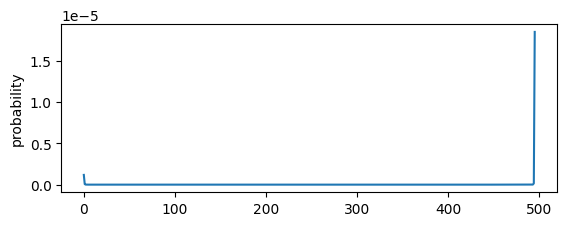

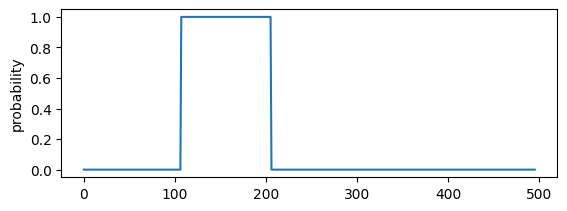

99
0
1/1 [==============================] - 0s 38ms/step


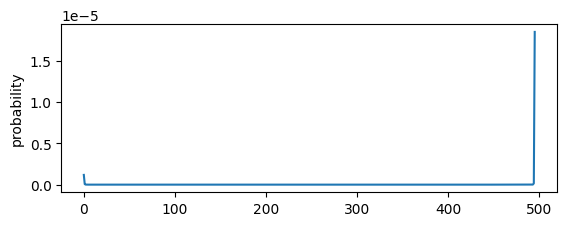

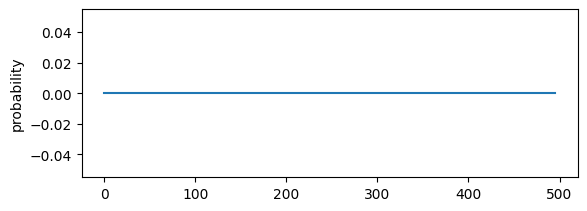

0
0
1/1 [==============================] - 0s 63ms/step


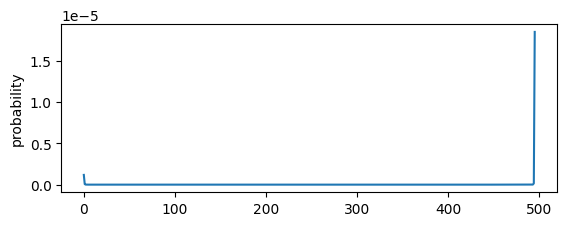

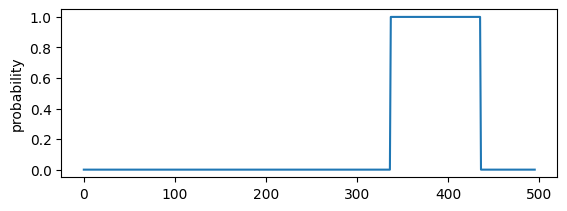

99
0
1/1 [==============================] - 0s 54ms/step


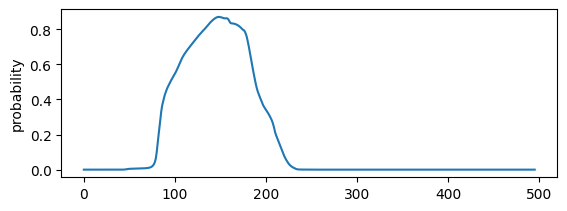

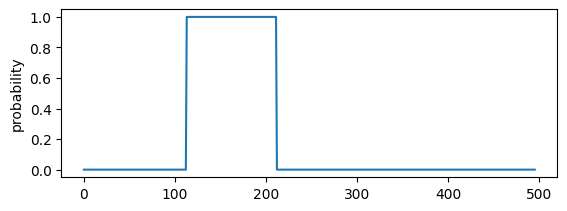

99
0
1/1 [==============================] - 0s 59ms/step


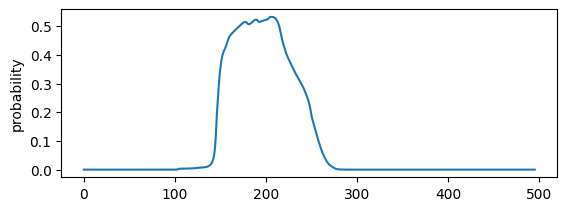

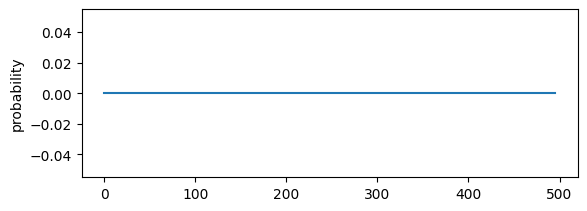

0
0
1/1 [==============================] - 0s 55ms/step


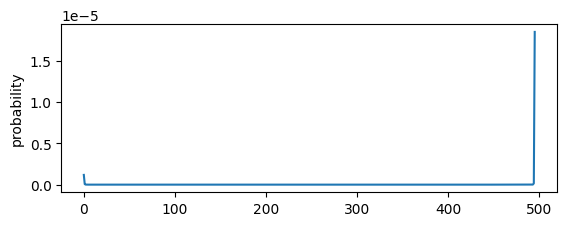

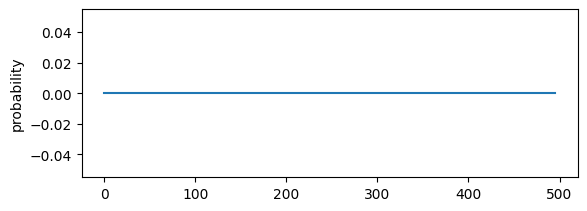

0
0
1/1 [==============================] - 0s 59ms/step


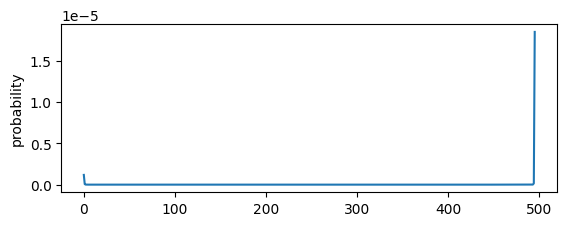

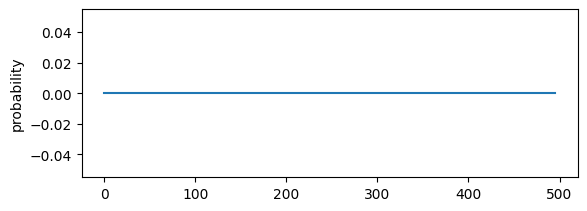

0
0
1/1 [==============================] - 0s 58ms/step


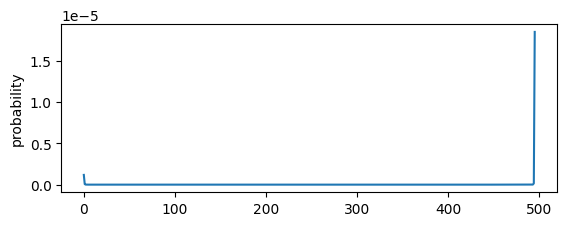

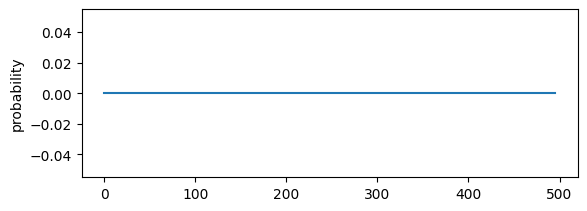

0
0
1/1 [==============================] - 0s 63ms/step


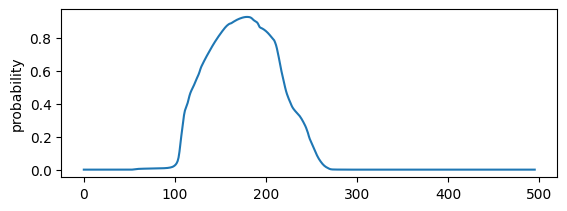

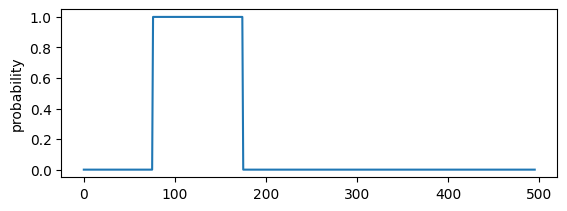

99
0
1/1 [==============================] - 0s 50ms/step


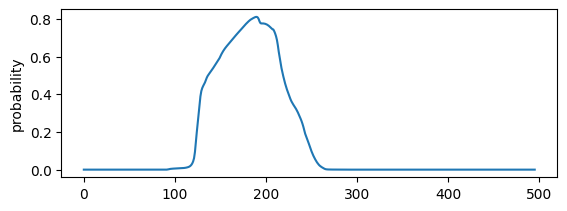

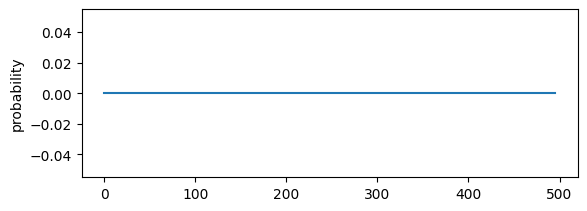

0
0


In [76]:
for idx in range(30, 40):
  predictions = detect(X_test[idx], y_test[idx])
  print(np.sum(y_test[idx] == 1))
  print(np.sum(predictions.flatten() == 1))

In [77]:
model.save("/content/drive/MyDrive/Hacktrick/models/40epoch.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [79]:
loss, acc, = model.evaluate(X_test, y_test)
print("Dev set accuracy = ", acc)

10/10 [==============================] - 1s 71ms/step - loss: 0.7276 - accuracy: 0.9046
Dev set accuracy =  0.9045833349227905


In [80]:
def eagle_solve(spect):
  spect = np.expand_dims(spect, axis=0)
  prediction = model.predict(spect)
  prediction = prediction > 0.5
  prediction = np.sum(prediction == True)
  return 1 if prediction > 20 else 0

In [81]:
print(eagle_solve(X_test[0]))
print(1 if np.sum(y_test[0] == 1) == 99 else 0)
print(eagle_solve(X_test[1]))
print(1 if np.sum(y_test[1] == 1) == 99 else 0)
print(eagle_solve(X_test[2]))
print(1 if np.sum(y_test[2] == 1) == 99 else 0)

1/1 [==============================] - 0s 39ms/step
1
1
1/1 [==============================] - 0s 39ms/step
0
1
1/1 [==============================] - 0s 47ms/step
0
0


In [82]:
count_miss = 0
count_1 = 0
count_0 = 0
for i,x in enumerate(X_test):
  t1 = eagle_solve(x)
  t2 = 1 if np.sum(y_test[i] == 1) >= 99 else 0
  if t1 != t2:
    count_1 += 1 if t2 == 1 else 0
    count_0 += 1 if t2 == 0 else 0
    print(i)
    count_miss += 1


1/1 [==============================] - 0s 40ms/step
1
1/1 [==============================] - 0s 43ms/step
4
1/1 [==============================] - 0s 42ms/step
8
1/1 [==============================] - 0s 45ms/step
9
1/1 [==============================] - 0s 47ms/step
10
1/1 [==============================] - 0s 40ms/step
12
1/1 [==============================] - 0s 41ms/step
14
1/1 [==============================] - 0s 48ms/step
15
1/1 [==============================] - 0s 40ms/step
17
1/1 [==============================] - 0s 76ms/step
21
1/1 [==============================] - 0s 131ms/step
25
1/1 [==============================] - 0s 72ms/step
27
1/1 [==============================] - 0s 106ms/step
29
1/1 [==============================] - 0s 72ms/step
30
1/1 [==============================] - 0s 46ms/step
32
1/1 [==============================] - 0s 47ms/step
34
1/1 [==============================] - 0s 46ms/step
39
1/1 [==============================] - 0s 48ms/step
40
1/1 [=======

In [83]:
print(count_miss)
print(count_1)
print(count_0)
print(len(y_test))

132
63
69
